# Visualisation of the LIFO monitoring mechanism evaluation - member-state scores

This notebook describes how the charts have been generated from the data provided by the member-states.

One starts off from importing the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The data are then imported and curated so as to easily analyse the relevant information.

In [2]:
data = pd.read_excel('SC82_D02.01(b) Finalised version of the LIFO monitoring mechanism_W2scores.xlsx',sheet_name='Questionnaire',
                     header=2,usecols=[1,9,13,14,15,16,17,18,19,20,21,22,23]).iloc[:-5]
data['Focus Areas']=data['Focus Areas'].fillna(method='ffill')
data_secondary = data.loc[~data.Informational.isna()]
data_primary = data.loc[~data.index.isin(data_secondary.index)].set_index(['Focus Areas','Id'])
data_secondary=data_secondary.set_index(['Focus Areas','Id'])

data_primary_group = data_primary.groupby('Focus Areas').sum()
data_secondary_group = data_secondary.groupby('Focus Areas').sum()

The colorset for the plots is defined

In [3]:
colors = ['b','cornflowerblue','g','limegreen','r','salmon','tab:gray','lightgray','m','violet','y','gold',
          'k','dimgray','tab:orange','moccasin','tab:purple','orchid']

The bar charts are generated

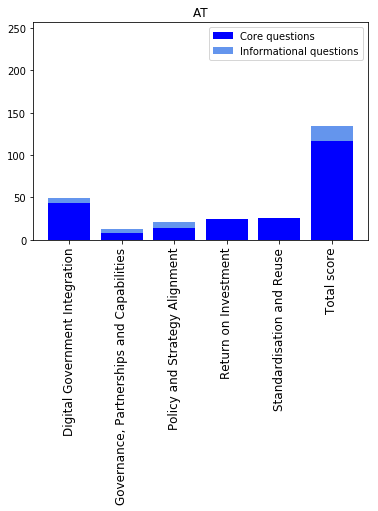

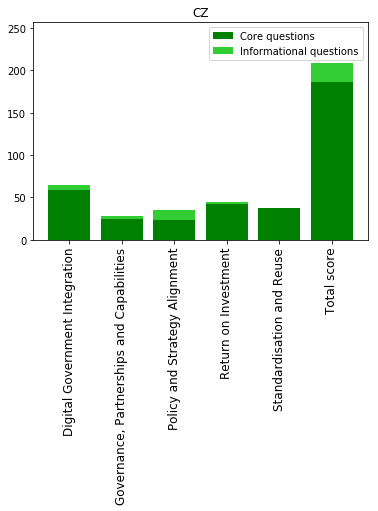

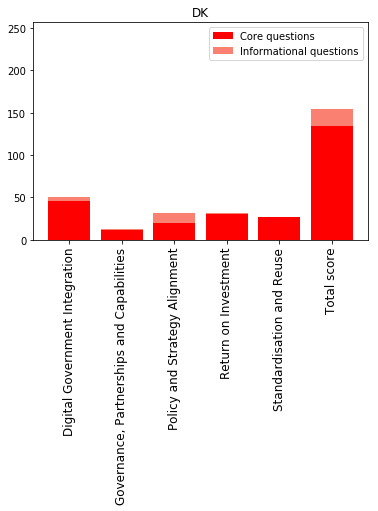

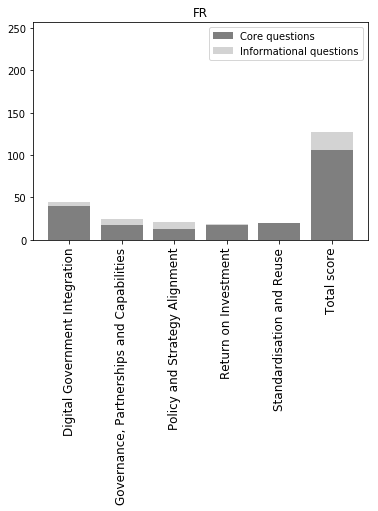

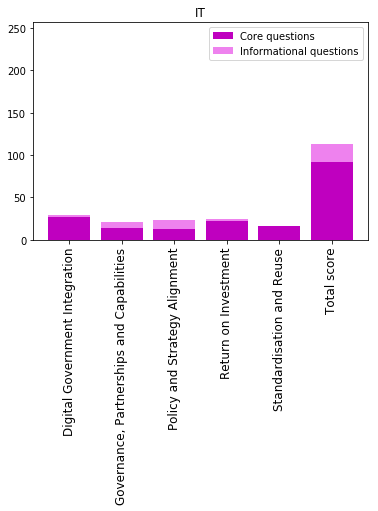

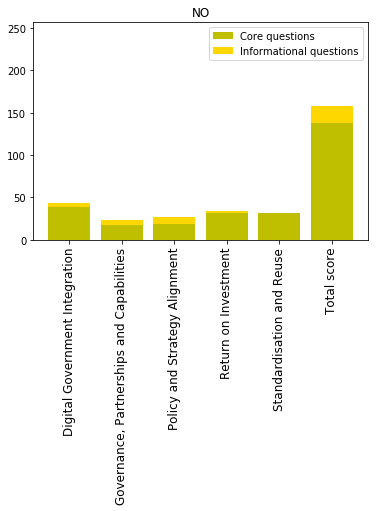

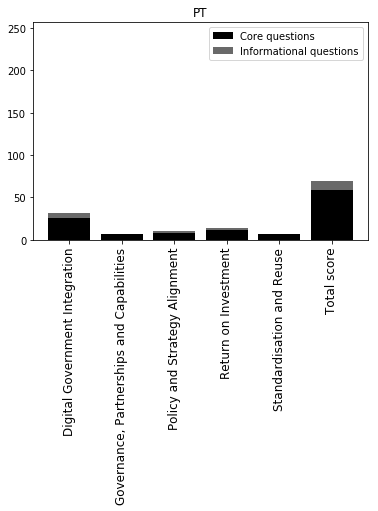

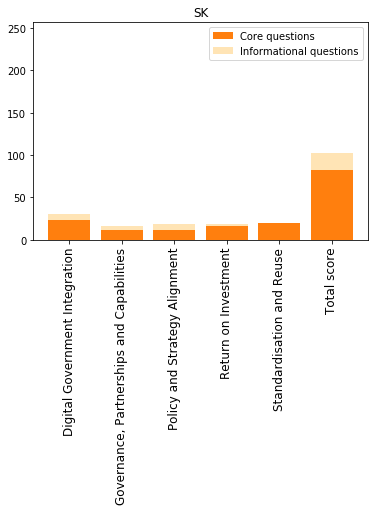

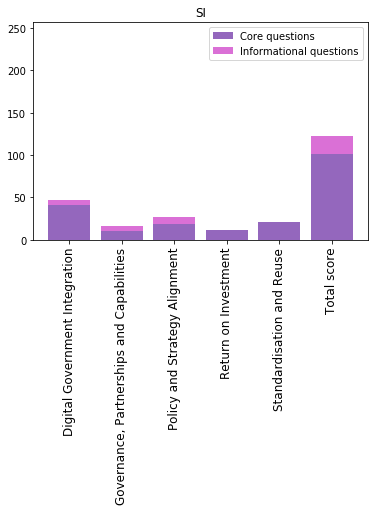

In [8]:
co = -2
for c in data_primary_group.iloc[:,:-1]:
    co+=2
    df_country = pd.concat([data_primary_group[c],data_secondary_group[c]],axis=1,sort=True).fillna(0)
    df_country.columns = ['Core questions','Informational questions']
    plt.bar(df_country.index,df_country.iloc[:,0],color=colors[co],label=df_country.columns[0])
    plt.bar(df_country.index,df_country.iloc[:,1],bottom=df_country.iloc[:,0],color=colors[co+1],label=df_country.columns[1])
    plt.bar(['Total score'],df_country.iloc[:,0].sum(),color=colors[co])
    plt.bar(['Total score'],df_country.iloc[:,1].sum(),bottom=df_country.iloc[:,0].sum(),color=colors[co+1])
    plt.ylim(top=data_primary_group['max'].sum()+data_secondary_group['max'].sum())
    plt.xticks(df_country.index.append(pd.Index(['Total score'])),
                df_country.index.append(pd.Index(['Total score'])), rotation='vertical')
    plt.title(c)
    plt.legend()
    plt.show()

Data are further curated for the radar charts

In [9]:
data_radar = pd.concat([data_primary,pd.DataFrame(columns=[d+str('_normalised') for d in data_primary.columns[:-1].values])],
                       axis=1).dropna(how='all')

data_radar[[d+str('_normalised') for d in data_radar.columns[1:-11].values]]=np.divide(data_radar.iloc[:,1:-11].values.T,
                                                                                      data_radar['max'].values).T

Radar plots are then produced per focus area at country level

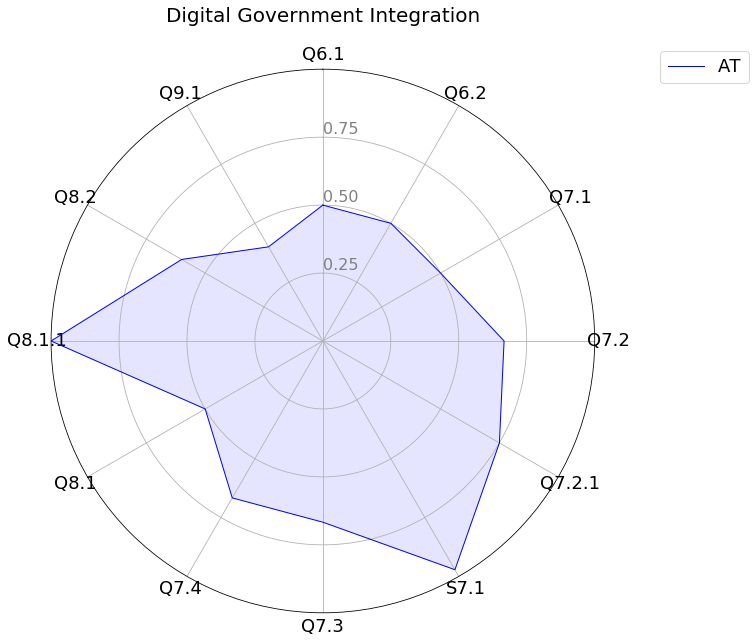

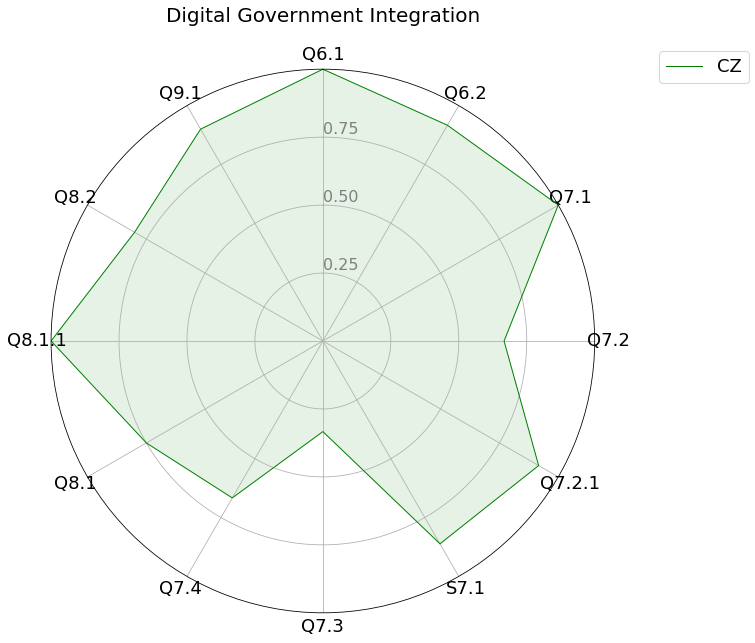

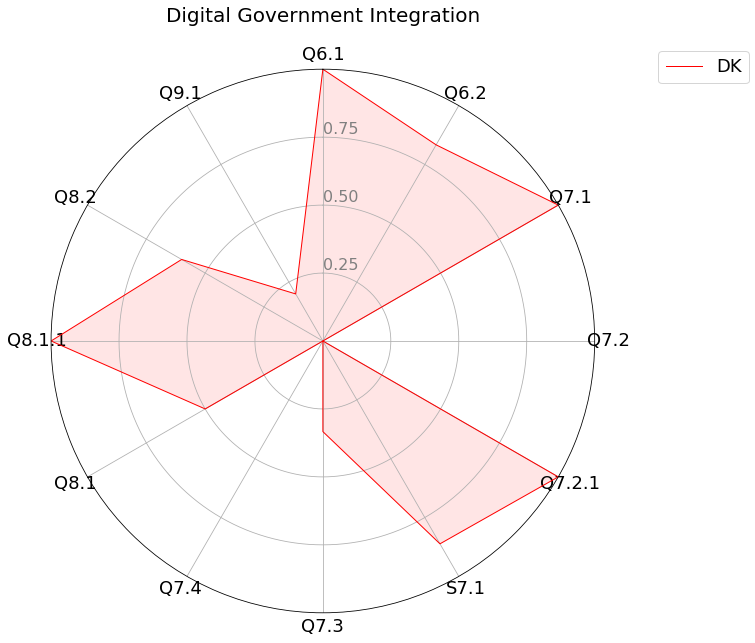

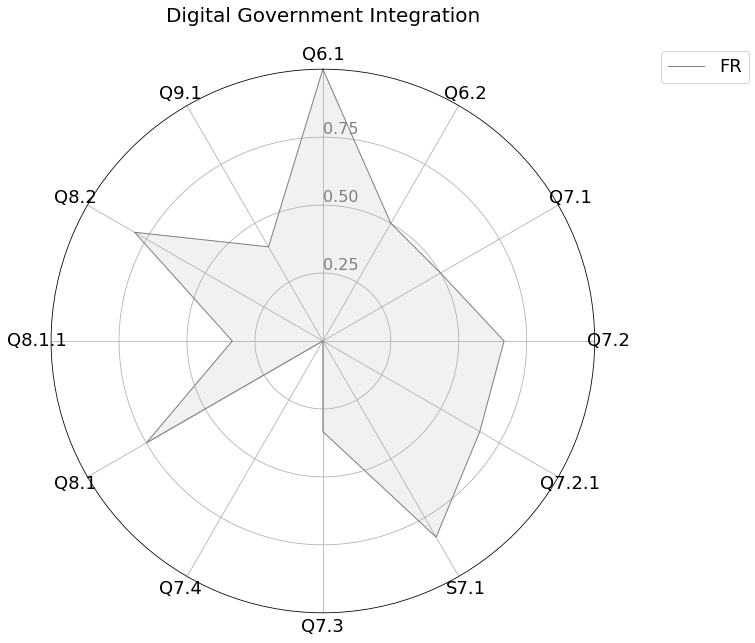

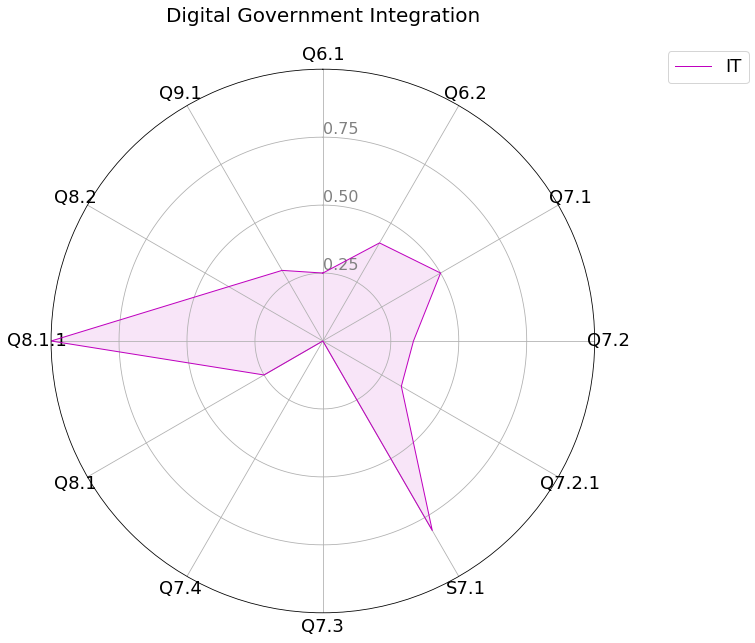

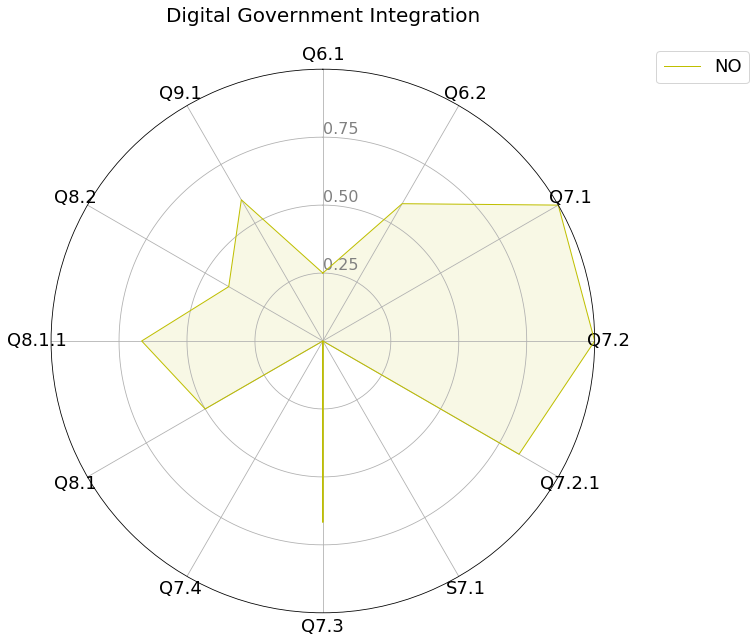

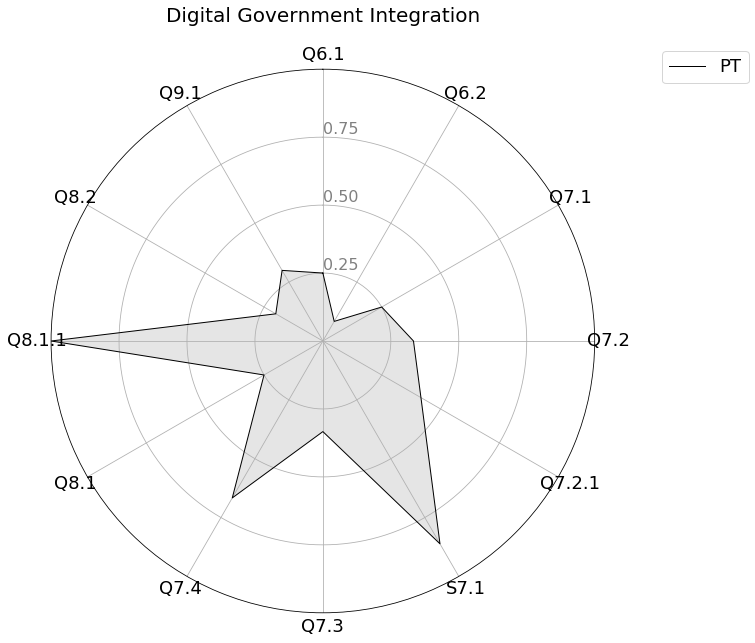

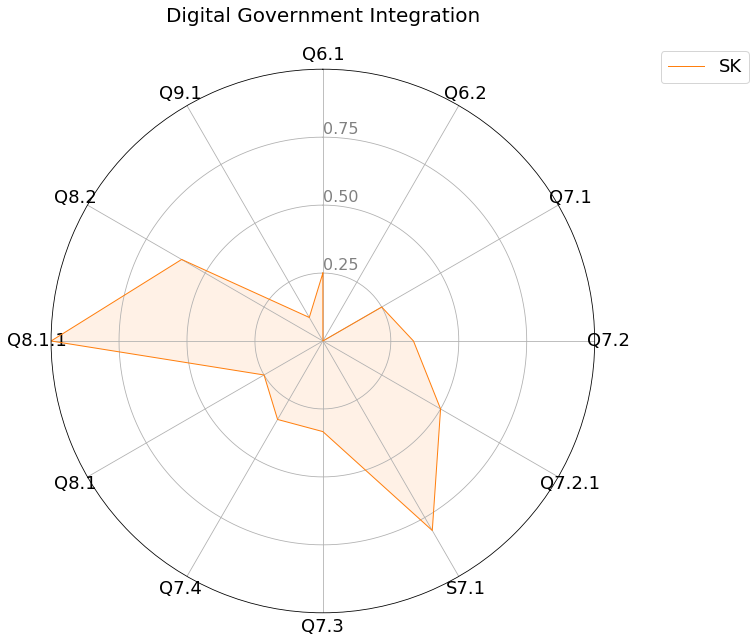

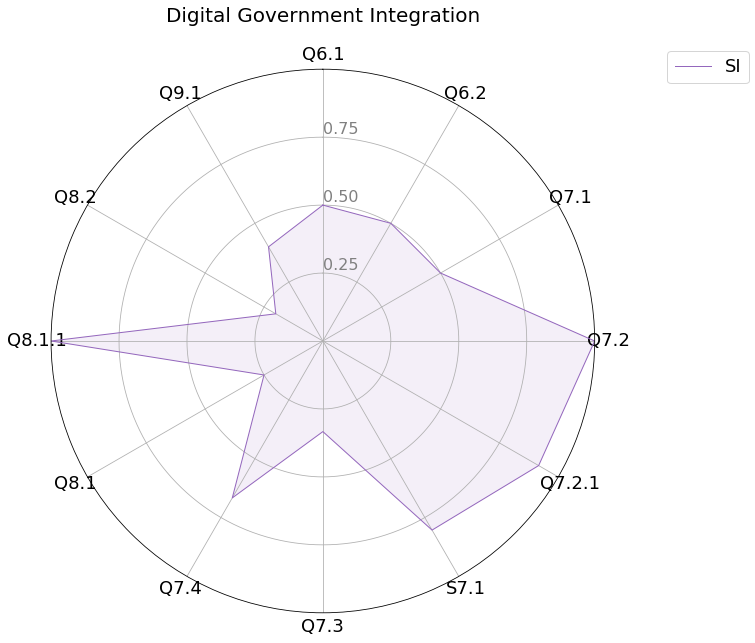

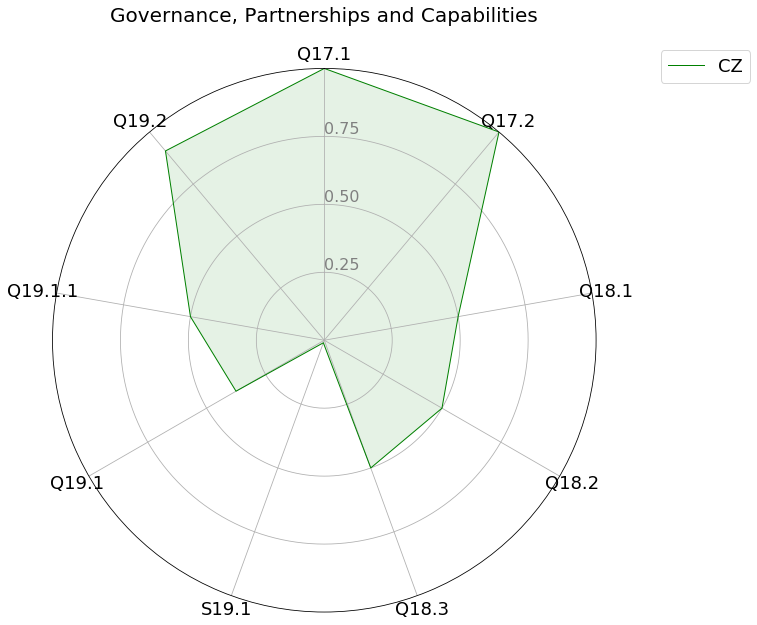

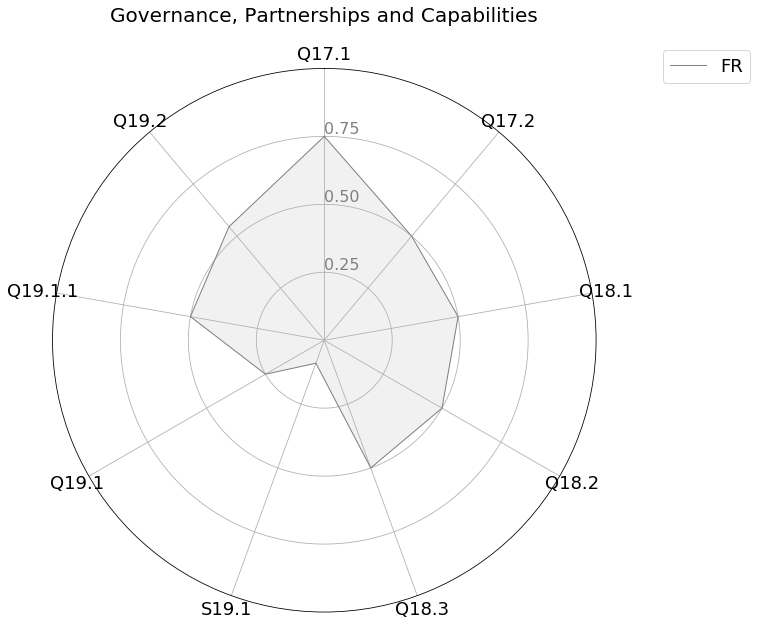

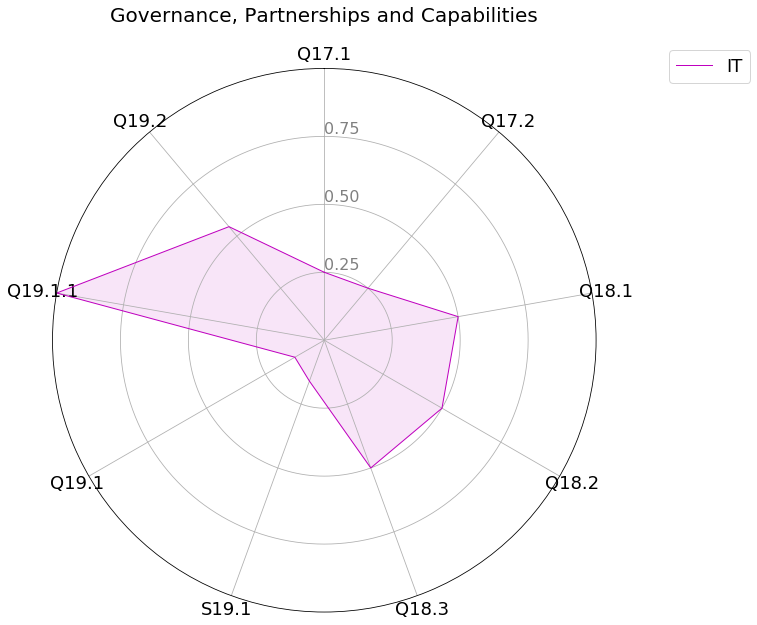

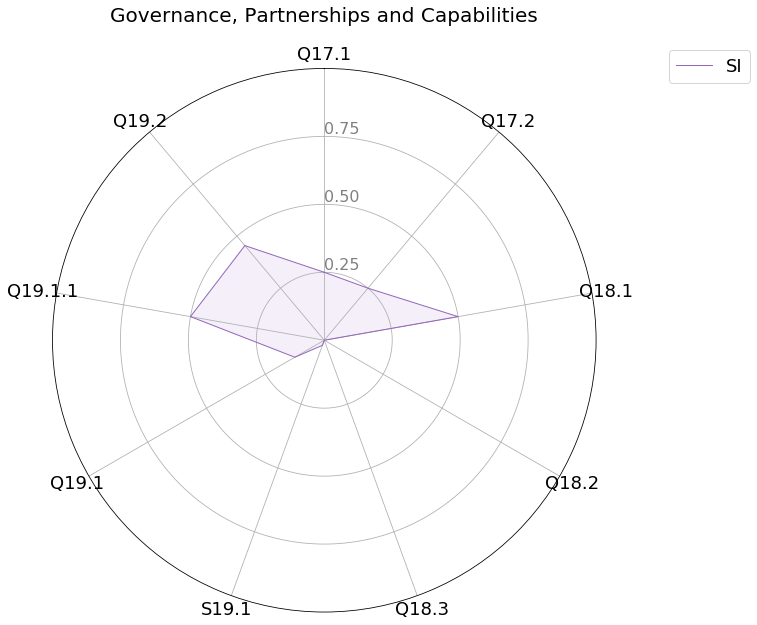

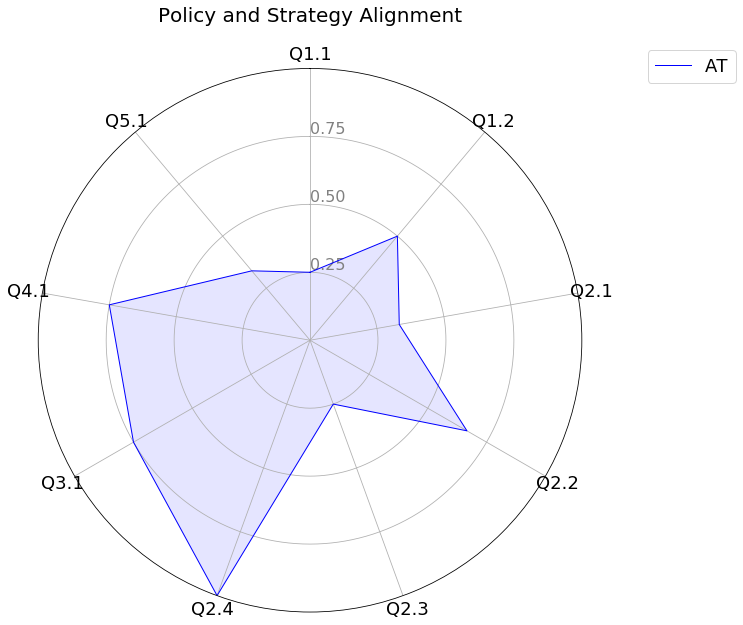

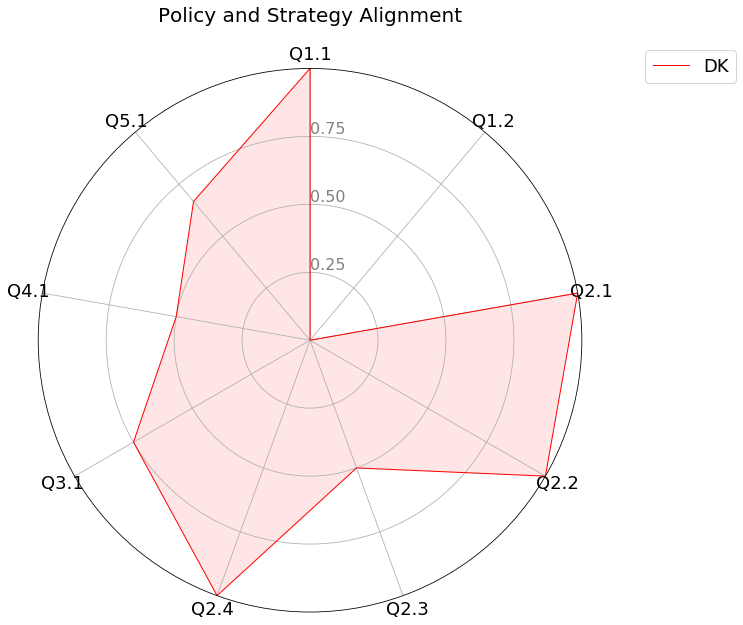

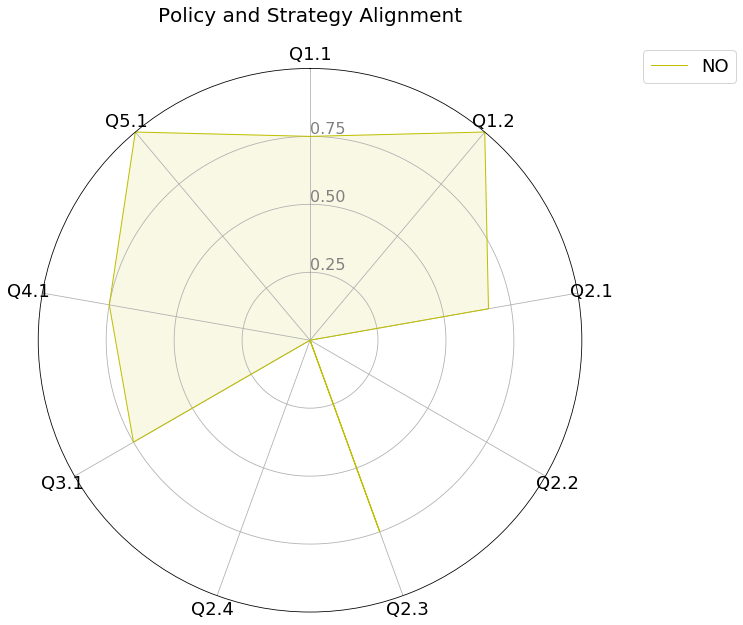

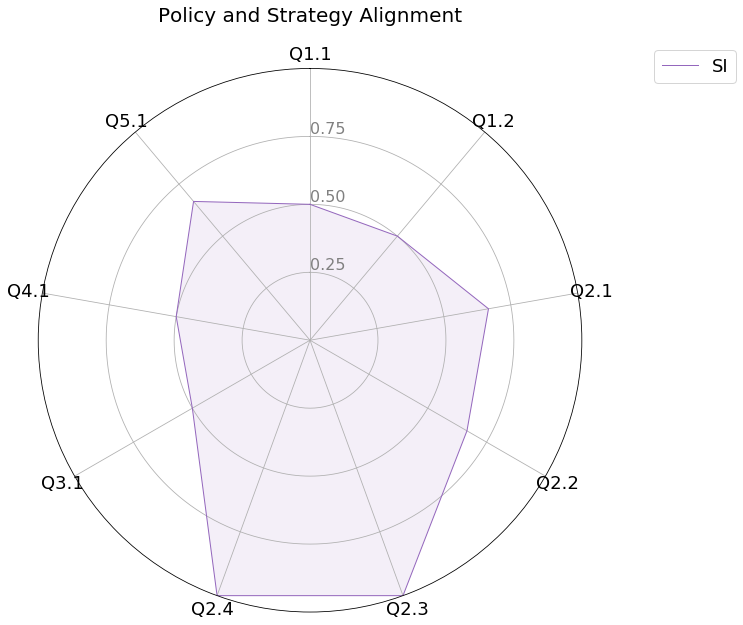

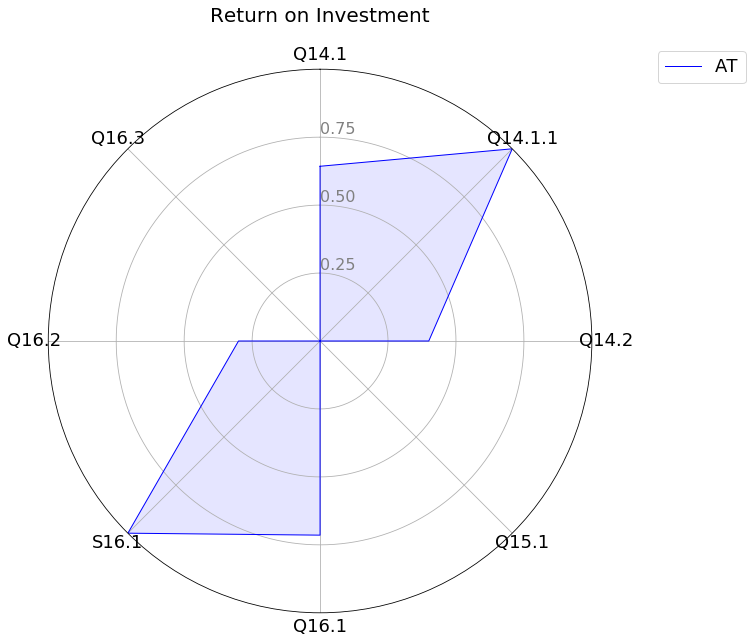

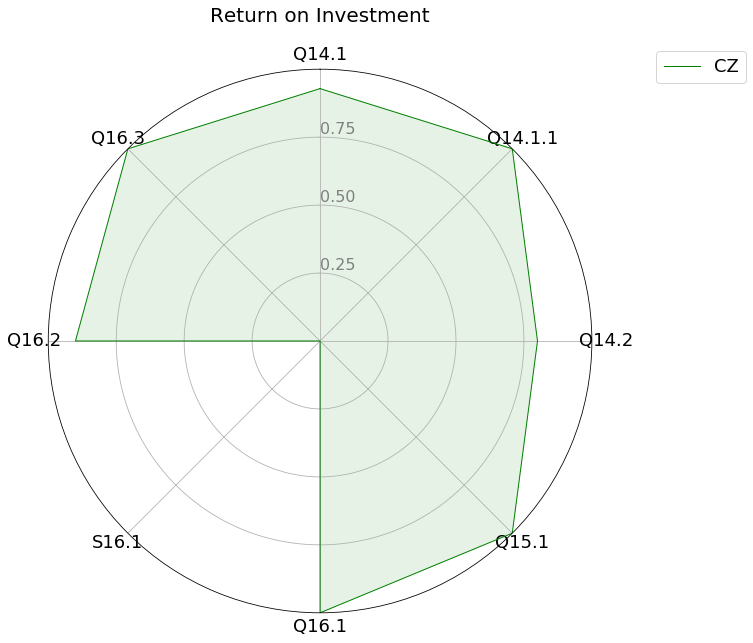

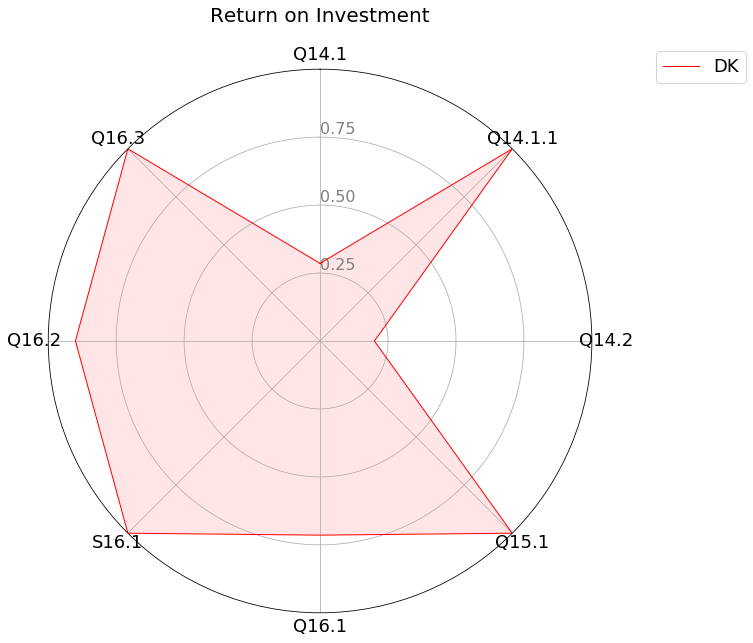

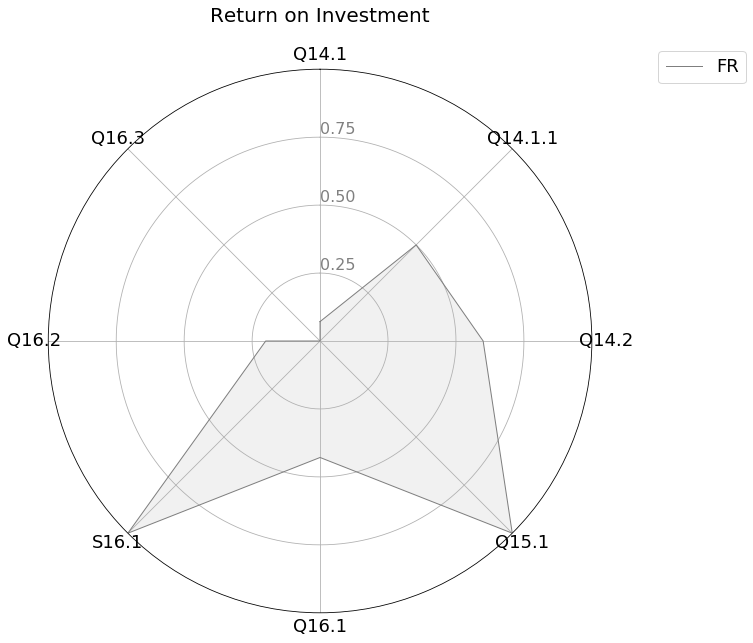

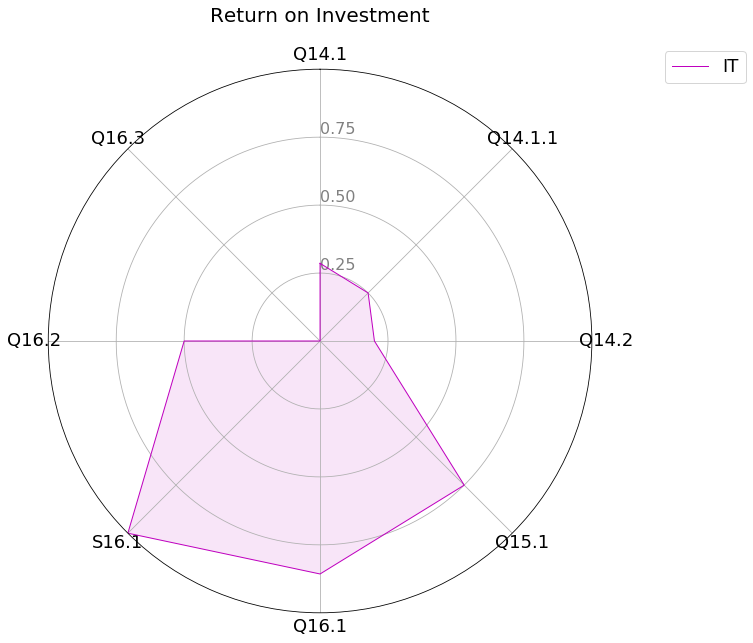

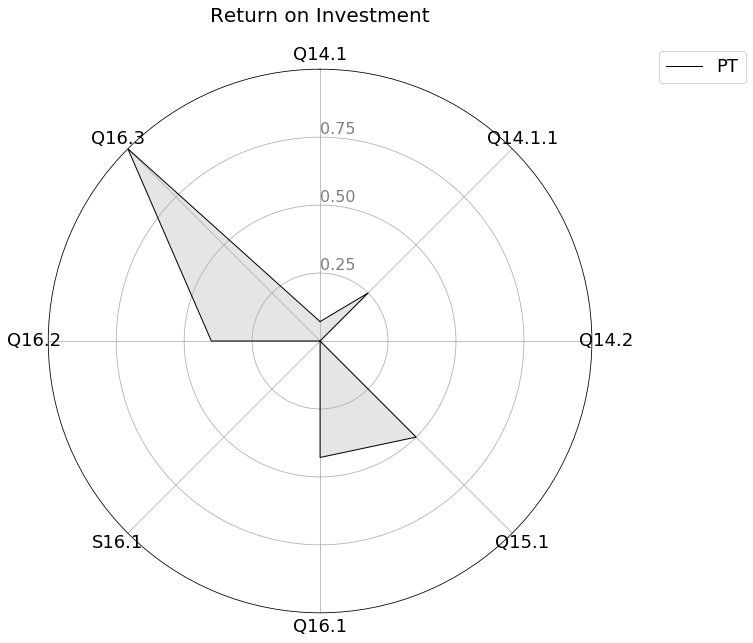

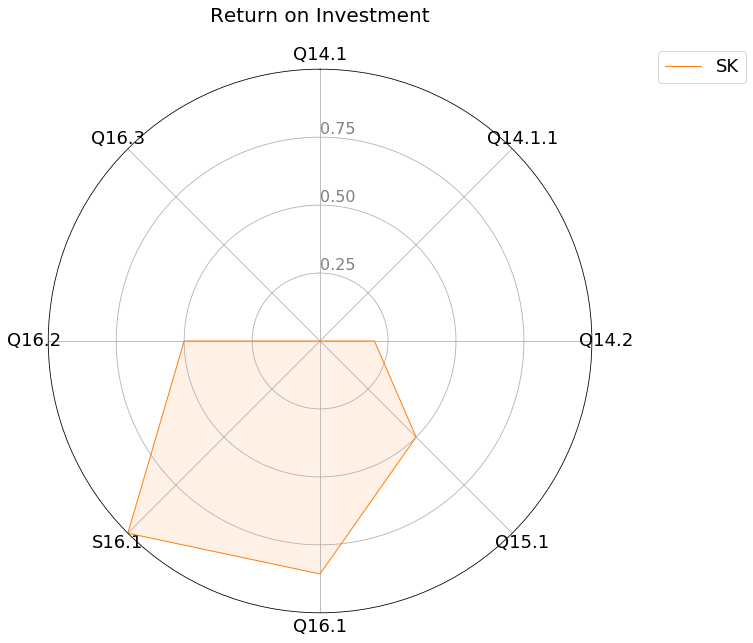

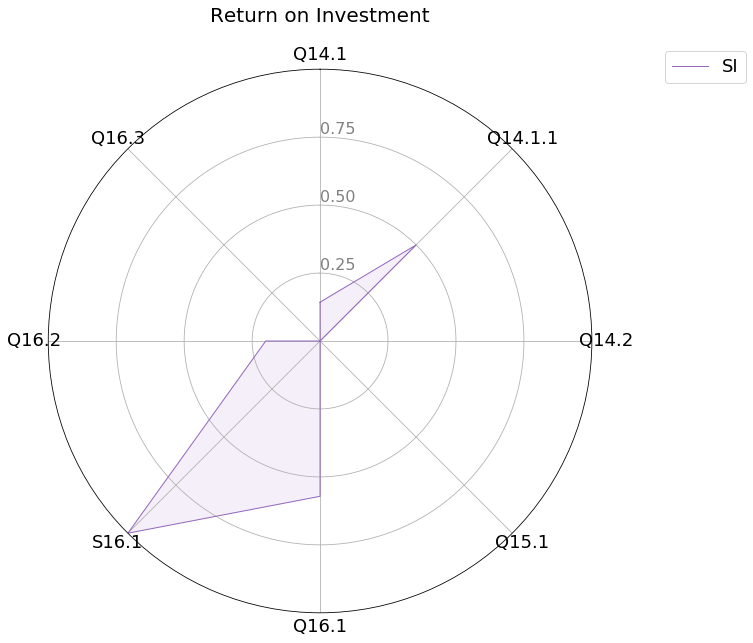

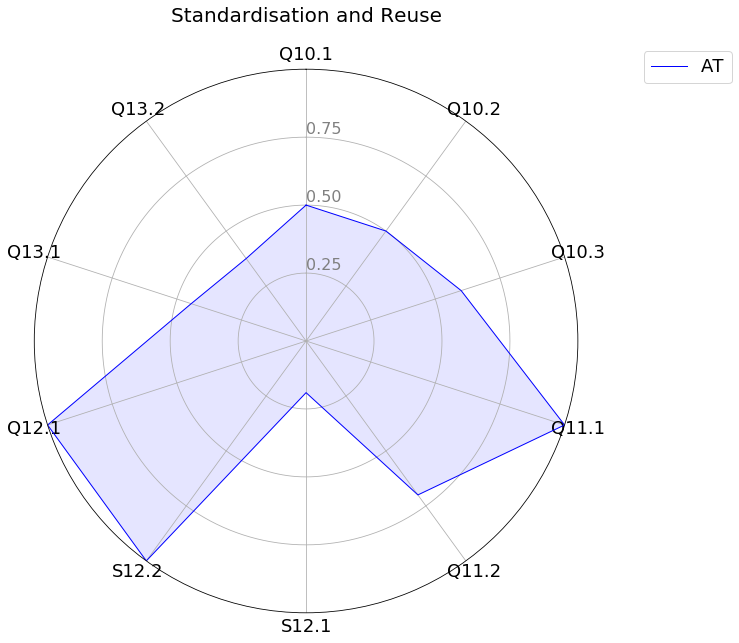

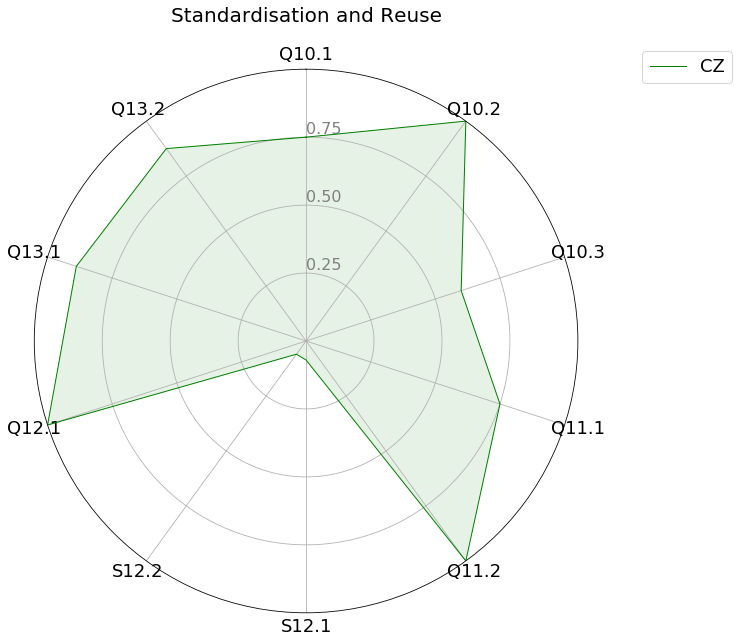

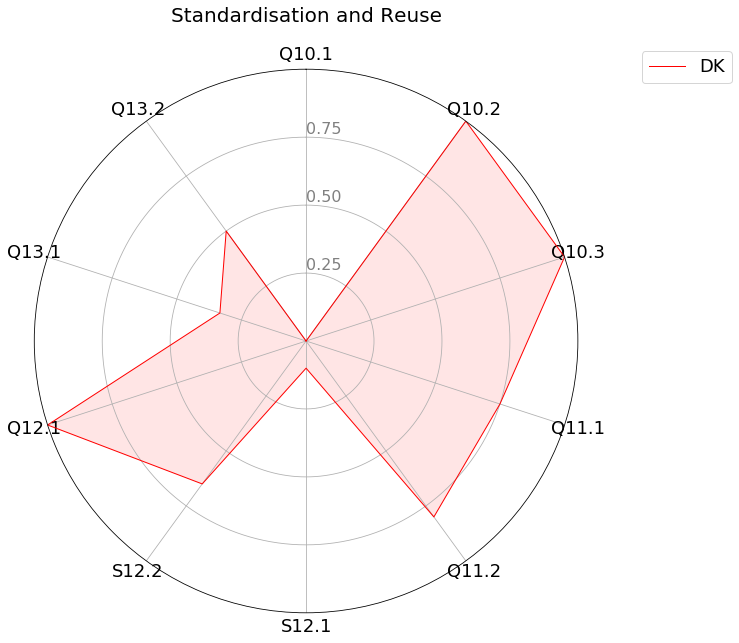

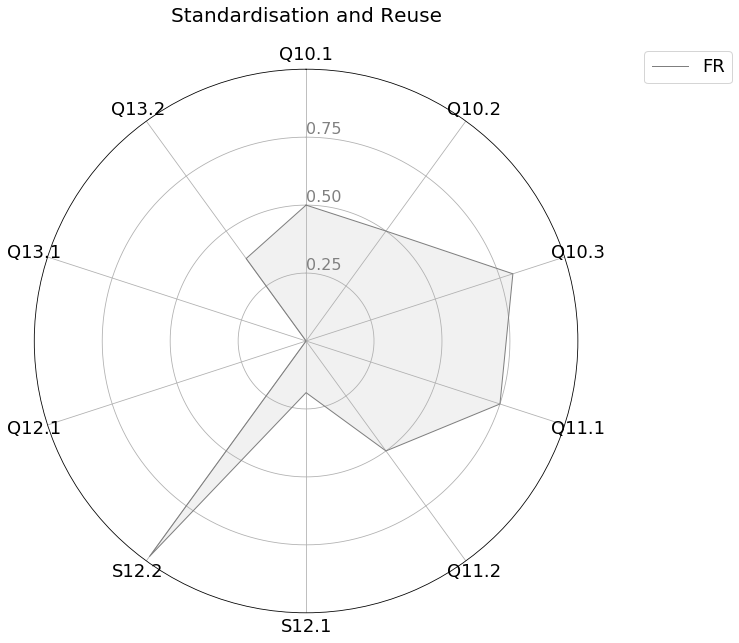

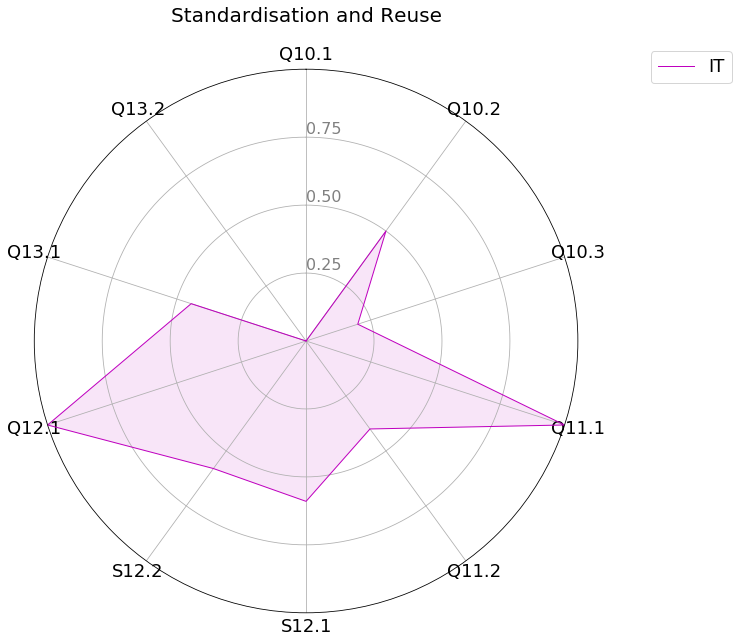

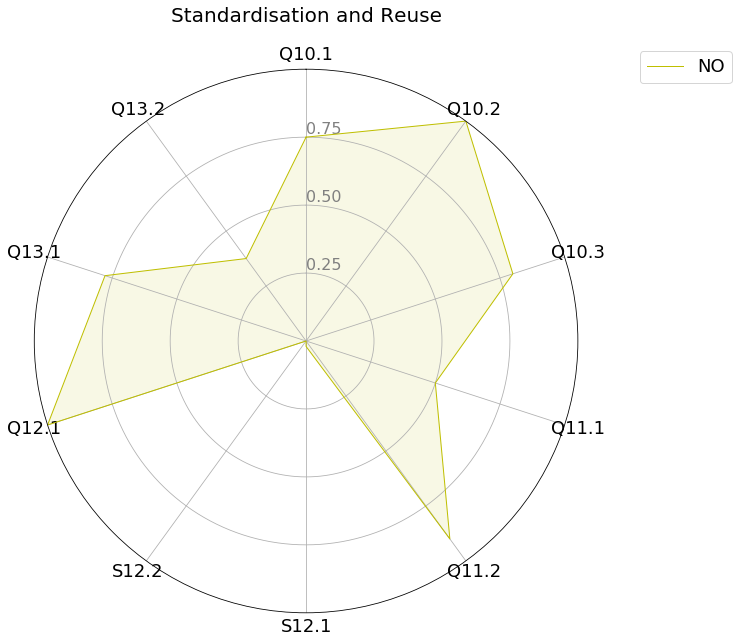

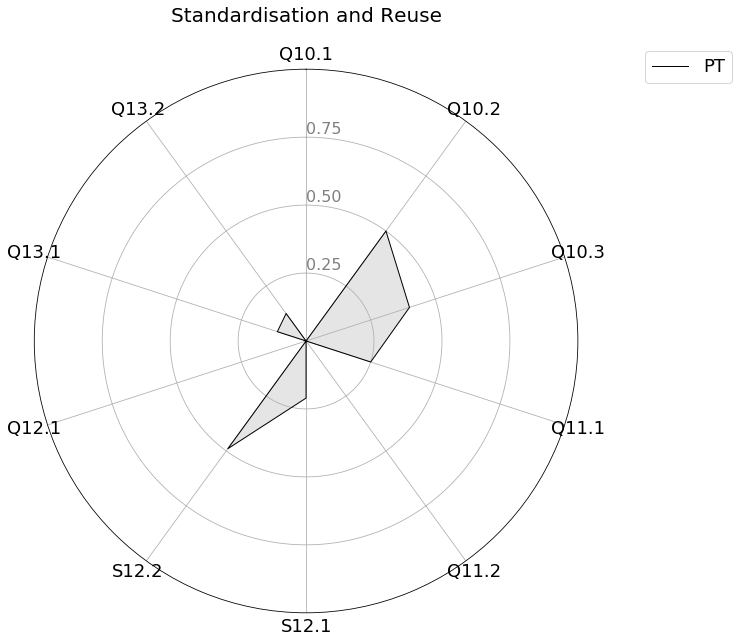

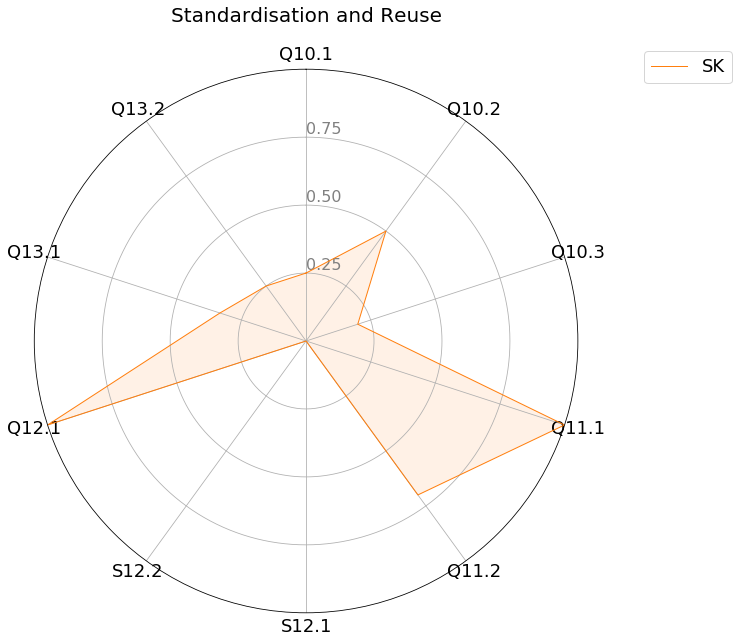

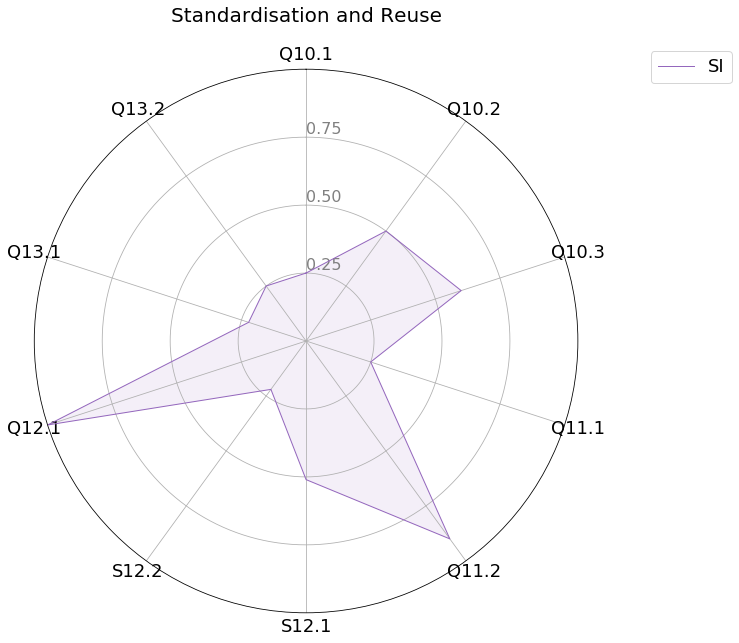

In [10]:
plt.rc('xtick', labelsize=18)

for ig, g in data_radar.groupby('Focus Areas'):
    co = -2
    for ex in g.iloc[:,-9:]:
        plt.figure(figsize=(15,10))
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n/float(len(g)) * 2 * np.pi for n in range(len(g))]
        angles += angles[:1]

        # Initialise the radar plot
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], g.index.get_level_values(1))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=16)
        plt.ylim(0,1)

        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        co+=2
        values=g[ex].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex[:2])
        ax.fill(angles, values, colors[co], alpha=0.1)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05),prop={'size': 18})
        ax.set_title(ig,pad=20,fontsize = 20)
        plt.show()

And for all the areas together.

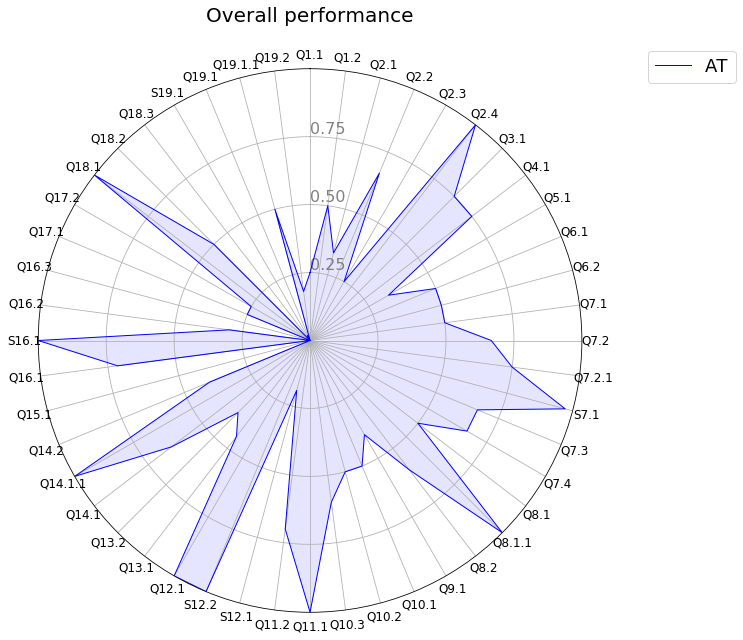

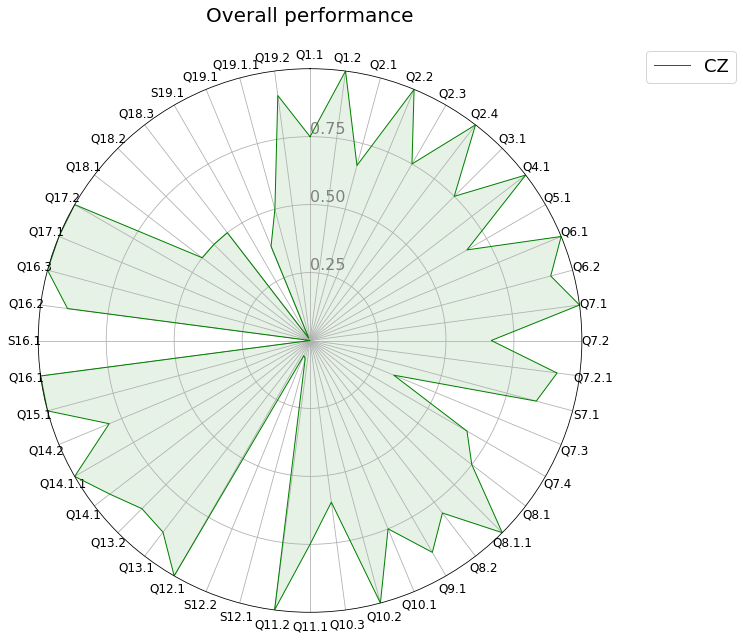

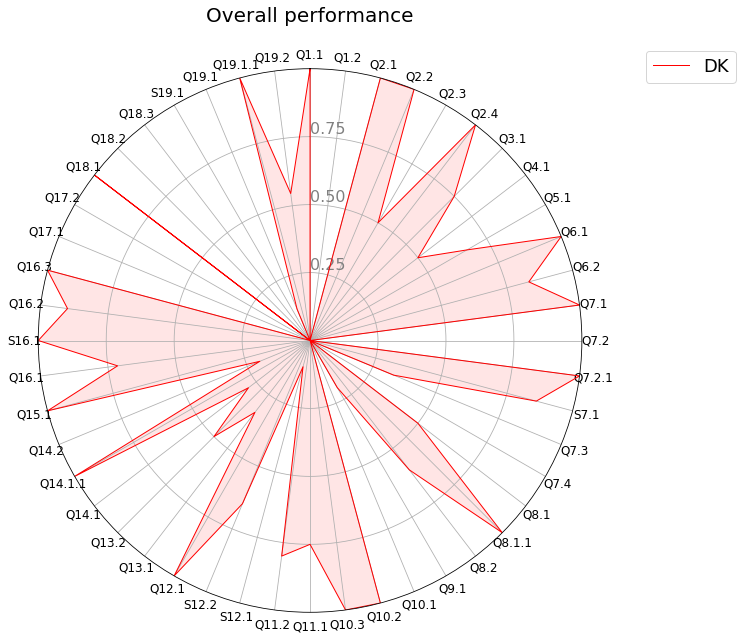

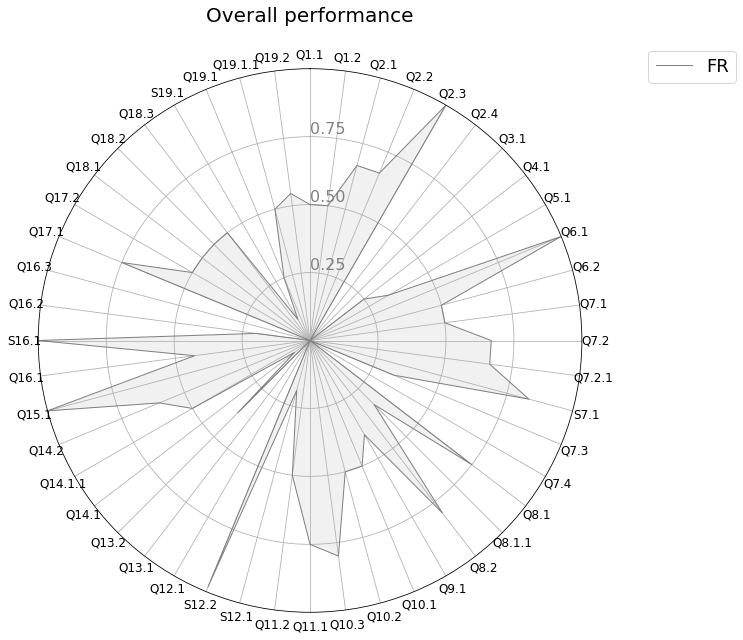

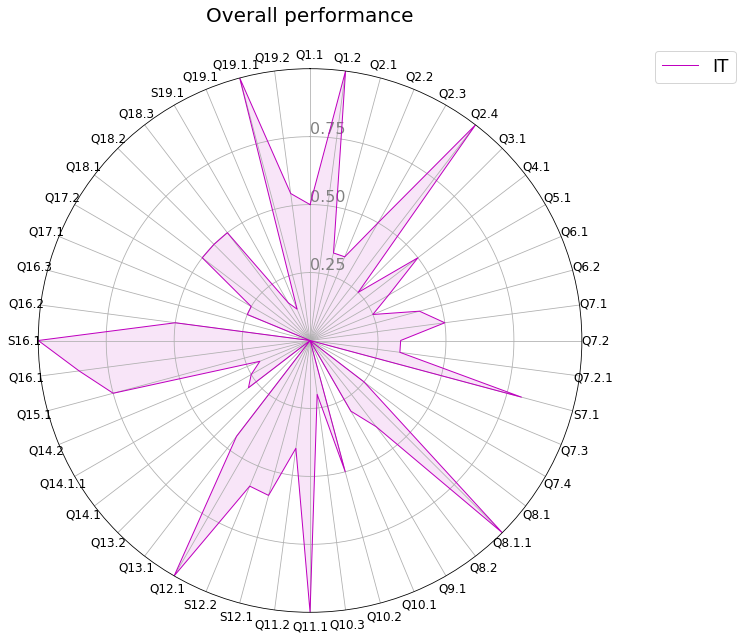

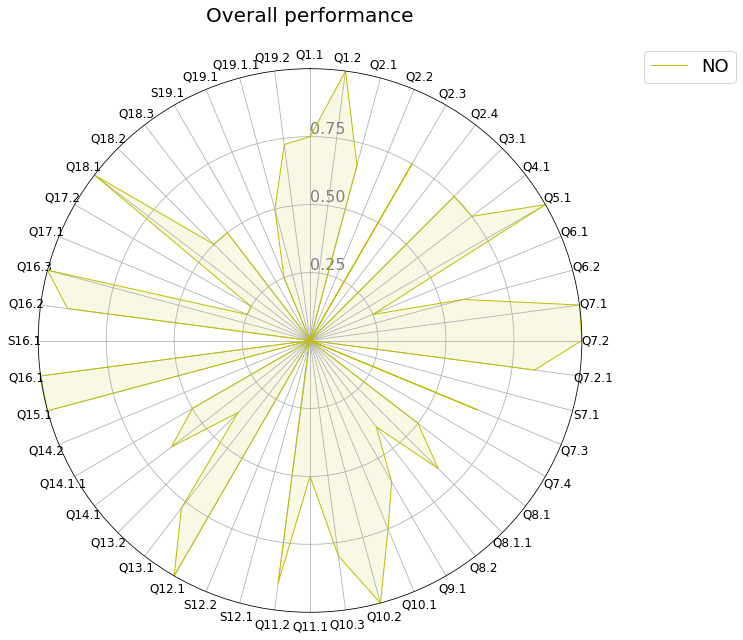

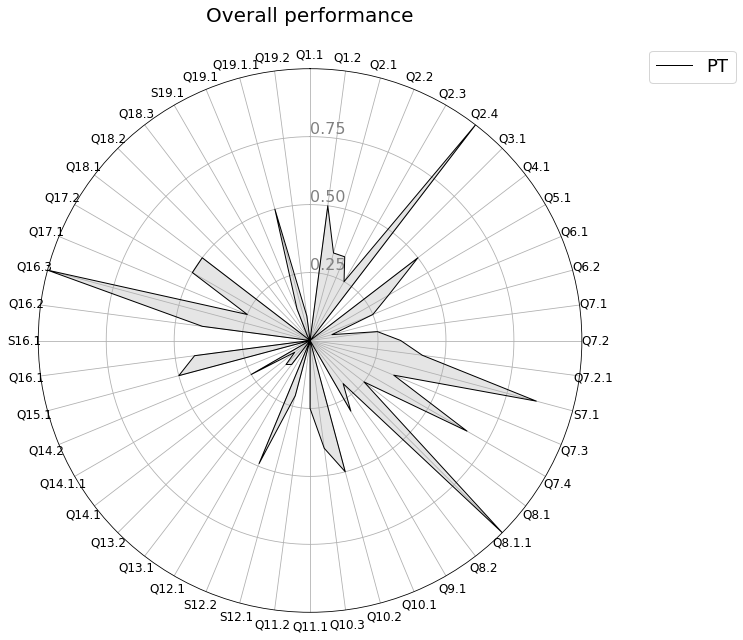

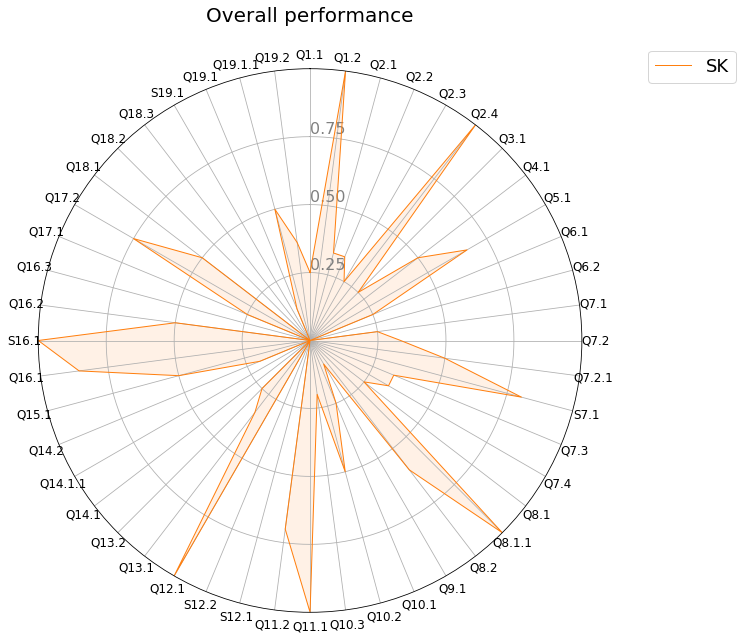

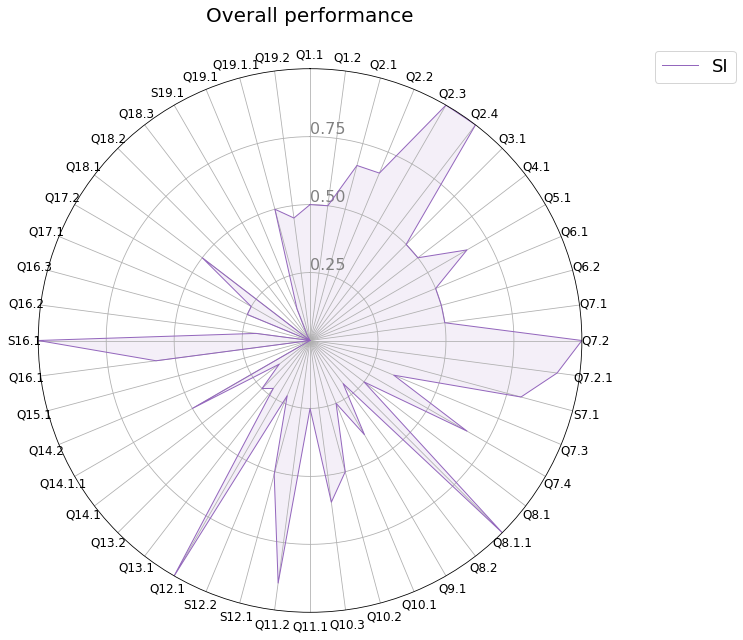

In [11]:
plt.rc('xtick', labelsize=12)
co = -2

for ex in data_radar.iloc[:,-9:]:
    plt.figure(figsize=(15,10))

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n/float(len(data_radar)) * 2 * np.pi for n in range(len(data_radar))]
    angles += angles[:1]

    # Initialise the radar plot
    ax1 = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax1.set_theta_offset(np.pi / 2)
    ax1.set_theta_direction(-1)

    # Draw one axis per variable + add labels labels yet
    plt.xticks(angles[:-1], data_radar.index.get_level_values(1))

    # Draw ylabels
    ax1.set_rlabel_position(0)
    plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=16)
    plt.ylim(0,1)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    co+=2
    values=data_radar[ex].values.flatten().tolist()
    values += values[:1]
    ax1.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex[:2])
    ax1.fill(angles, values, colors[co], alpha=0.1)
    ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05),prop={'size': 18})
    ax1.set_title('Overall performance',pad=20,fontsize=20)
    plt.show()